In [50]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

### Data Import and Test/Train Split

In [15]:
#read data in from CSV and display stats
data = pd.read_csv("Stats_AS_Target.csv",sep = ",",header=0)
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bbref_id,3936.0,NaN,NaN,NaN,576991.614329,72794.656217,112526.0,527054.0,594838.0,640458.5,686681.0
season,3936.0,NaN,NaN,NaN,2019.27998,1.79364,2017.0,2018.0,2019.0,2021.0,2022.0
Name,3936,1708,Matt Olson,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,3936.0,NaN,NaN,NaN,28.003557,3.656675,19.0,25.0,27.0,30.0,45.0
Level,3936,3,Maj-NL,2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team,3936,113,Los Angeles,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,3936.0,NaN,NaN,NaN,36.937754,31.647301,1.0,6.0,28.0,68.0,99.0
PA,3936.0,NaN,NaN,NaN,131.849339,131.152797,1.0,12.0,81.5,246.0,442.0
AB,3936.0,NaN,NaN,NaN,117.770071,116.94014,1.0,11.0,73.0,219.0,405.0
R,3936.0,NaN,NaN,NaN,15.766768,17.931012,0.0,1.0,8.0,28.0,85.0


In [120]:
#filter to show only players with 100 or more plate appearances
data_100PA = data[data.PA>99]

In [121]:
data_100PA.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bbref_id,1834.0,NaN,NaN,NaN,577715.495093,73841.607443,112526.0,530297.75,594826.0,641355.0,686681.0
season,1834.0,NaN,NaN,NaN,2019.40458,1.855647,2017.0,2018.0,2019.0,2021.0,2022.0
Name,1834,726,Willson Contreras,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1834.0,NaN,NaN,NaN,28.447655,3.660398,19.0,26.0,28.0,31.0,43.0
Level,1834,3,Maj-AL,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team,1834,70,Los Angeles,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,1834.0,NaN,NaN,NaN,67.088332,17.907437,23.0,53.0,70.0,82.75,99.0
PA,1834.0,NaN,NaN,NaN,254.065431,90.090529,100.0,172.25,258.0,333.0,442.0
AB,1834.0,NaN,NaN,NaN,226.830425,80.005743,82.0,155.25,230.0,297.0,405.0
R,1834.0,NaN,NaN,NaN,31.309706,15.020954,4.0,19.0,29.5,42.0,85.0


In [497]:
#remove non numeric and non model columns
data_reduced = data_100PA.drop(['bbref_id','Name','Age','Level','Team','G','AB','X3B','IBB','uBB','SO','HBP','SH','SF','GDP','SB','CS'], axis=1)

In [123]:
test_labels=np.asarray(data_reduced[data_reduced.season==2022][['yearName','AS_Roster']])

In [124]:
train_labels=np.asarray(data_reduced[data_reduced.season<2022][['yearName','AS_Roster']])

In [498]:
data_reduced

,season,PA,R,H,X1B,X2B,HR,RBI,BB,BA,OBP,SLG,OPS,yearName,AS_Roster
0,2022,415,44,93,42,34,17,60,47,0.255,0.340,0.488,0.828,2022 Matt Olson,0
1,2022,412,59,85,51,23,9,49,41,0.241,0.335,0.394,0.729,2022 Jake Cronenworth,1
2,2022,411,49,99,65,20,14,50,25,0.257,0.302,0.418,0.720,2022 Bo Bichette,0
3,2022,407,54,89,58,12,16,66,36,0.248,0.324,0.432,0.756,2022 Francisco Lindor,0
4,2022,406,60,114,68,31,13,59,43,0.321,0.397,0.530,0.926,2022 Freddie Freeman,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,2017,104,6,12,8,2,2,5,3,0.121,0.154,0.202,0.356,2017 Luke Maile,0
3493,2017,103,16,23,14,4,4,8,7,0.242,0.294,0.432,0.726,2017 Peter Bourjos,0
3494,2017,102,17,26,18,3,5,15,5,0.271,0.314,0.458,0.772,2017 Andrew Toles,0
3495,2017,102,17,25,17,5,2,8,6,0.269,0.317,0.409,0.725,2017 Juan Lagares,0


In [126]:
#filter data to show only test data which is the 2022 season
test_data = data_reduced[data_reduced.season==2022].drop(['season','yearName','AS_Roster'],axis=1)
col_names = list(test_data.columns)
print(col_names)

['PA', 'R', 'H', 'X1B', 'X2B', 'HR', 'RBI', 'BB', 'BA', 'OBP', 'SLG', 'OPS']


In [127]:
min_max_scaler = preprocessing.MinMaxScaler()
test_data_scaled = min_max_scaler.fit_transform(test_data)
test_data_scaled

array([[1.        , 0.56521739, 0.78787879, ..., 0.66210046, 0.62414579,
        0.63549921],
       [0.99047619, 0.7826087 , 0.70707071, ..., 0.63926941, 0.41002278,
        0.47860539],
       [0.98730159, 0.63768116, 0.84848485, ..., 0.48858447, 0.46469248,
        0.46434231],
       ...,
       [0.0031746 , 0.02898551, 0.01010101, ..., 0.32876712, 0.15261959,
        0.19175911],
       [0.        , 0.14492754, 0.08080808, ..., 0.52511416, 0.3143508 ,
        0.37242472],
       [0.        , 0.11594203, 0.03030303, ..., 0.25114155, 0.17084282,
        0.17749604]])

In [128]:
train_data_season = data_reduced[data_reduced.season<2022].drop(['yearName','AS_Roster'],axis=1)

In [129]:
yearList = [2021,2019,2018,2017]
scaled_arrays = []
min_max_scaler = preprocessing.MinMaxScaler()

for i in range(0,len(yearList)):
    temp_table = train_data_season[train_data_season.season==yearList[i]].drop(['season'],axis=1)
    X_minmax = min_max_scaler.fit_transform(temp_table)

    if i == 0:
        scaled_arrays.append(X_minmax)
    else:    
        stacked = np.vstack([scaled_arrays[0], X_minmax])
        scaled_arrays[0] = stacked

In [130]:
train_data_scaled = scaled_arrays[0]

### KNN Classification

In [316]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    """ return index locations of K neighbors and distances """
    if measure == 0:
        # euclidean distances from test vector x to vectors in matrix D
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # find the vector norm for each instance in D 
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        # find norm for vector x
        x_norm = np.linalg.norm(x)
        # Compute Cosine
        ## Divide the dot product of x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # distance measure is represented by the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return indecies of K nearest neighbors
    return idx[:K], dists

def knn_classify(name,x, D, K, labels, measure):
    from collections import Counter
    # pass params to knn_search and return list of indicies of neighbors and associated distances
    neighbor_idx, distances = knn_search (x, D, K, measure)
    vote_dist = []
    for i in range(len(neighbor_idx)):
        if labels[neighbor_idx[i],1]==1:
            vote_dist.append([neighbor_idx[i],distances[neighbor_idx[i]]])
    # match labels to neighbor indicies
    neighbor_labels = labels[neighbor_idx,1]
    count = Counter(neighbor_labels)
    #print(name,'labels for top', K, 'neighbors: ', count)
    return count.most_common(1)[0][0],count[1],vote_dist

def knn_eval(test_mat, D, K, test_labels, train_labels,measure):
    # measure of 0 for euclidian, 1 for cosine similarity
    predictions = 0
    correct_predictions = 0
    vote_tracker = []
    vote_distances = []
    TruePos = 0
    TrueNeg = 0
    FalsePos = 0
    FalseNeg = 0
    
    for i in range(len(test_mat)):
        pred_cat, votes, vote_dist = knn_classify(test_labels[i,0],test_mat[i], D, K, train_labels, measure)
        vote_tracker.append([test_labels[i,0],votes,test_labels[i,1]])
        vote_distances.append(vote_dist)
        if pred_cat == test_labels[i,1]:
            predictions += 1
            correct_predictions += 1
            if pred_cat == 0:
                TrueNeg += 1
            else:
                TruePos += 1
        else:
            predictions += 1
            if pred_cat == 0:
                FalseNeg += 1
            else:
                FalsePos += 1
            
    accuracy = correct_predictions/predictions
    
    print('TruePos: ',TruePos)
    print('TrueNeg: ',TrueNeg)
    print('FalsePos: ',FalsePos)
    print('FalseNeg: ',FalseNeg)
    
    return accuracy,vote_tracker,FalseNeg,vote_distances

In [519]:
#iterate accross multiple k values using cosine similarity
xvec = []
yvec = []
falseNegVec = []
for i in range(1,5,2):
    playerSelectionSize = 80
    acc,vote_tracker,falseCount,vote_distances = knn_eval(test_data_scaled, train_data_scaled, i,test_labels,train_labels,1)
    votes_array = np.asarray(vote_tracker)
    votes_sorted = votes_array[votes_array[:, 1].argsort()][::-1][:playerSelectionSize]
    total_correct = np.sum(votes_sorted[:,2].astype(int))
    xvec.append(i)
    yvec.append(100*(total_correct/playerSelectionSize))
    falseNegVec.append(falseCount)
    print('At K=',i,' pct_correct=',round(100*(total_correct/playerSelectionSize),2))
    


TruePos:  14
TrueNeg:  301
FalsePos:  17
FalseNeg:  36
At K= 1  pct_correct= 28.75
TruePos:  5
TrueNeg:  313
FalsePos:  5
FalseNeg:  45
At K= 3  pct_correct= 27.5


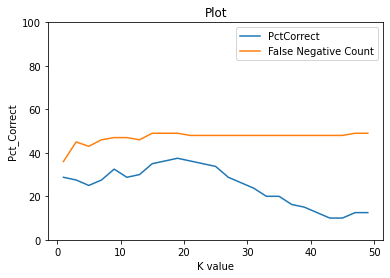

In [252]:
#plot pct correct at each k
plt.plot(xvec, yvec,label="PctCorrect")
plt.plot(xvec, falseNegVec,label="False Negative Count")
plt.title('Plot')
plt.xlabel('K value')
plt.ylabel('Pct_Correct')
plt.ylim((0, 100))
plt.legend()
plt.show()

In [237]:
#find max k for cosine distance
peak_k_cos = xvec[yvec.index(max(yvec))]
print('Peak K= ',peak_k_cos)

Peak K=  19


In [318]:
#iterate accross different k using euclidian distance similarity
xvec = []
yvec = []
falseNegVec = []
for i in range(1,9,2):
    playerSelectionSize = 80
    acc,vote_tracker,falseCount,vote_distances= knn_eval(test_data_scaled, train_data_scaled, i,test_labels,train_labels,0)
    votes_array = np.asarray(vote_tracker)
    votes_sorted = votes_array[votes_array[:, 1].argsort()][::-1][:playerSelectionSize]
    total_correct = np.sum(votes_sorted[:,2].astype(int))
    xvec.append(i)
    yvec.append(100*(total_correct/playerSelectionSize))
    falseNegVec.append(falseCount)
    print('At K=',i,' pct_correct=',round(100*(total_correct/playerSelectionSize),4))

TruePos:  20
TrueNeg:  304
FalsePos:  14
FalseNeg:  30
At K= 1  pct_correct= 33.75
TruePos:  23
TrueNeg:  308
FalsePos:  10
FalseNeg:  27
At K= 3  pct_correct= 50.0
TruePos:  22
TrueNeg:  311
FalsePos:  7
FalseNeg:  28
At K= 5  pct_correct= 47.5
TruePos:  19
TrueNeg:  315
FalsePos:  3
FalseNeg:  31
At K= 7  pct_correct= 48.75


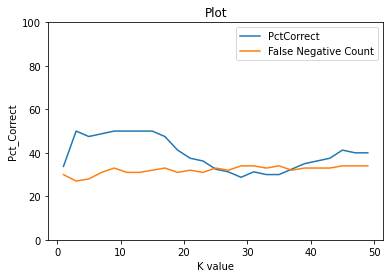

In [254]:
#plot pct correct at each k
plt.plot(xvec, yvec,label="PctCorrect")
plt.plot(xvec, falseNegVec,label="False Negative Count")
plt.title('Plot')
plt.xlabel('K value')
plt.ylabel('Pct_Correct')
plt.ylim((0, 100))
plt.legend()
plt.show()

In [255]:
#find max k for euvlidian distance
peak_k_euclidian = xvec[yvec.index(max(yvec))]
print('Peak K= ',peak_k_euclidian)

#find k at min false negative count
k_at_minFalse = xvec[falseNegVec.index(min(falseNegVec))]
print('K at minFalseNegative val= ',k_at_minFalse)

Peak K=  3
K at minFalseNegative val=  3


In [257]:
playerSelectionSize = 80
acc,vote_tracker,false = knn_eval(test_data_scaled, train_data_scaled, 3,test_labels,train_labels,0)
votes_array = np.asarray(vote_tracker)
votes_sorted = votes_array[votes_array[:, 1].argsort()][::-1][:playerSelectionSize]

TruePos:  23
TrueNeg:  308
FalsePos:  10
FalseNeg:  27


In [263]:
pd.set_option('display.max_rows', 80)
votes_df = pd.DataFrame(votes_sorted)
votes_df.columns =['Name', 'Votes', 'AS_Selection']

In [267]:
votes_df

,Name,Votes,AS_Selection
0,2022 Aaron Judge,3,1
1,2022 Bryce Harper,3,1
2,2022 Mike Trout,3,1
3,2022 Yordan Alvarez,3,1
4,2022 Xander Bogaerts,3,1
5,2022 Rafael Devers,3,1
6,2022 Paul Goldschmidt,3,1
7,2022 Pete Alonso,3,1
8,2022 Garrett Cooper,3,1
9,2022 Freddie Freeman,3,1


In [282]:
votes_df["AS_Selection"] = votes_df["AS_Selection"].astype(int)
print('Observed Accuracy Based on Votes Recieved:')
grouped_acc = votes_df[votes_df.Votes>'0'][['Votes','AS_Selection']].groupby(['Votes']).mean()
print(grouped_acc)

Observed Accuracy Based on Votes Recieved:
       AS_Selection
Votes              
1          0.441176
2          0.565217
3          1.000000


In [310]:
#True positives and false negatives with votes divided by total true positives
print('total found       :  ',total_correct[0])
print('total to be found :  ',np.sum(test_labels[:,1]))
print('found pct         :  ',total_correct[0]/np.sum(test_labels[:,1]))

total found       :   38
total to be found :   50
found pct         :   0.76


In [335]:
acc,vote_tracker,falseCount,vote_distances= knn_eval(test_data_scaled, train_data_scaled, 3,test_labels,train_labels,0)

TruePos:  23
TrueNeg:  308
FalsePos:  10
FalseNeg:  27


In [424]:
combined_adjusted_vote_distance = []
for i in range(len(vote_distances)):
    val_list = vote_distances[i]
    sum_dist = 0
    
    if not val_list:
        sum_dist = 0
    else:
        for j in range(len(val_list)):
            sum_dist += val_list[j][1]
    combined_adjusted_vote_distance.append([sum_dist])
combined_adjusted_vote_distance=np.array(combined_adjusted_vote_distance)

In [429]:
#combine vote distance with vote tracker
all_data = np.append(vote_tracker, combined_adjusted_vote_distance, 1)
all_data

array([['2022 Matt Olson', '2', '0', '0.6733332291700858'],
       ['2022 Jake Cronenworth', '2', '1', '0.5789970018758763'],
       ['2022 Bo Bichette', '1', '0', '0.25508246286315317'],
       ...,
       ['2022 Kurt Suzuki', '0', '0', '0.0'],
       ['2022 Ryan McKenna', '0', '0', '0.0'],
       ['2022 TJ Friedl', '0', '0', '0.0']], dtype='<U32')

In [443]:
#convert array to Data frame
df_all_data=pd.DataFrame(all_data)
df_all_data.columns =['Name', 'Votes', 'AS_Selection','Distance Score']

In [516]:
#sort data frame by votes (most to least) and distance score (least to most)
n_picks = 60
top_AS_Picks = df_all_data.sort_values(by = ['Votes', 'Distance Score'], ascending = [False, True]).iloc[:n_picks]
print(top_AS_Picks)

#pct correct calculation
total_correct_picks = pd.to_numeric(top_AS_Picks['AS_Selection']).sum()
total_AS = 50
pct_correct = 100*total_correct_picks/total_AS
print()
print("When Selecting {} Players of a possible {}, selections were {}% correct.".format(n_picks,total_AS,pct_correct))

                           Name Votes AS_Selection       Distance Score
97          2022 Garrett Cooper     3            1   0.6360958863051904
4          2022 Freddie Freeman     3            1   0.8575271499193013
13             2022 Pete Alonso     3            1   0.8812986297197546
32         2022 Xander Bogaerts     3            1   0.8953661815444751
29           2022 Rafael Devers     3            1   0.9452037248003773
98              2022 Mike Trout     3            1    1.094442095534846
20             2022 Aaron Judge     3            1   1.1747228821853903
167           2022 Bryce Harper     3            1   1.2073150765724685
18        2022 Paul Goldschmidt     3            1   1.2115767808945368
111         2022 Yordan Alvarez     3            1   1.3991805976288478
23           2022 Shohei Ohtani     2            1   0.3614264712073376
108      2022 Giancarlo Stanton     2            1  0.41107161465611003
102            2022 Luis Robert     2            0   0.419585835

In [524]:
pd.set_option('display.max_rows', 60)
top_AS_Picks

,Name,Votes,AS_Selection,Distance Score
97,2022 Garrett Cooper,3,1,0.6360958863051904
4,2022 Freddie Freeman,3,1,0.8575271499193013
13,2022 Pete Alonso,3,1,0.8812986297197546
32,2022 Xander Bogaerts,3,1,0.8953661815444751
29,2022 Rafael Devers,3,1,0.9452037248003773
98,2022 Mike Trout,3,1,1.094442095534846
20,2022 Aaron Judge,3,1,1.1747228821853903
167,2022 Bryce Harper,3,1,1.2073150765724685
18,2022 Paul Goldschmidt,3,1,1.2115767808945368
111,2022 Yordan Alvarez,3,1,1.3991805976288478


### Cluster Analysis

In [353]:
from numpy import *

def distCosine(vecA, vecB):
    # find the vector norm vecA 
    A_norm = np.linalg.norm(vecA)
    # find the vector norm vecB
    B_norm = np.linalg.norm(vecB)
    # Compute Cosine
    ## Divide the dot product of vecA and vecB by the product of the two norms
    sims = np.dot(vecA,vecB)/(A_norm * B_norm)
    # distance measure is represented by the inverse of Cosine similarity
    dists = 1 - sims
    return dists #returns cosine similarity

def randCent(dataSet, k):
	n = shape(dataSet)[1]
	centroids = zeros((k,n), dtype=float)
	for j in range(n): #create random cluster centers
		minJ = min(dataSet[:,j])
		rangeJ = float(max(dataSet[:,j]) - minJ)
		centroids[:,j] = minJ + rangeJ * random.rand(k)
	return centroids 

def kMeans(dataSet, k, distMeas=distCosine, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [545]:
#DT_train_array = np.array(DT_train)
centroids, clusters = kMeans(train_data_scaled, 4, distMeas=distCosine, createCent=randCent)
centroids_df = pd.DataFrame(centroids, columns=col_names)

In [546]:
centroids_df

,PA,R,H,X1B,X2B,HR,RBI,BB,BA,OBP,SLG,OPS
0,0.101420,0.147785,0.155944,0.145504,0.165063,0.123077,0.157590,0.136251,0.498263,0.501032,0.397705,0.427164
1,0.700044,0.528127,0.553335,0.420927,0.468483,0.491181,0.574908,0.433684,0.511912,0.534656,0.515198,0.522835
2,0.682149,0.459767,0.600339,0.577079,0.481841,0.233328,0.406732,0.301490,0.580543,0.514303,0.402197,0.436579
3,0.346374,0.288125,0.331810,0.292063,0.298148,0.235436,0.301903,0.231312,0.527887,0.512072,0.449310,0.468811


### centroid 0 appears to represent players with very few plate appearances, these are either players who have been injured, or guys who are just on the edge of making the every day lineup. centroid 1 and 2 both appear to be geared towards players with a higher number of plate appearances, so typically better players, however, the power numbers appear to be higher in centroid 1, with more home runs, RBI, and higher Slugging percentage. Centroid 2 has higher hits, and batting average. finally, centroid 3 represents backup players that get more playing time than the fringe players, but less than the every day players.

### players matched to nearest centroid

In [549]:
rowlist=[]
for i in range(centroids.shape[0]):
    rowlist.append([i])
centroid_labels = np.array(rowlist)

test_mat =test_data_scaled
doc_index_names = test_labels[:,0]
cluster_results=[]
for entry in range(len(test_mat)): 
    D_norm = np.array([np.linalg.norm(centroids[i]) for i in range(len(centroids))])
    # find norm for vector x
    x_norm = np.linalg.norm(test_mat[entry])
    # Compute Cosine
    ## Divide the dot product of x and each instance in D by the product of the two norms
    sims = np.dot(centroids,test_mat[entry])/(D_norm * x_norm)
    # distance measure is represented by the inverse of Cosine similarity
    dists = 1 - sims
    idx = np.argsort(dists) # sorting
        # return indecies of K nearest neighbors
    nearest_idx=idx[:1]
    cos_dist=dists[nearest_idx]
    
    cluster_results.append([doc_index_names[entry],nearest_idx[0],round(cos_dist[0],4)])
    print('Player Name           : ',doc_index_names[entry])
    print('Nearest Centroid Class: ',nearest_idx[0])
    print('Nearest Centroid Dist : ',round(cos_dist[0],4))
    print('----------------------------------------------')

Player Name           :  2022 Matt Olson
Nearest Centroid Class:  1
Nearest Centroid Dist :  0.0189
----------------------------------------------
Player Name           :  2022 Jake Cronenworth
Nearest Centroid Class:  2
Nearest Centroid Dist :  0.0205
----------------------------------------------
Player Name           :  2022 Bo Bichette
Nearest Centroid Class:  2
Nearest Centroid Dist :  0.0135
----------------------------------------------
Player Name           :  2022 Francisco Lindor
Nearest Centroid Class:  1
Nearest Centroid Dist :  0.0183
----------------------------------------------
Player Name           :  2022 Freddie Freeman
Nearest Centroid Class:  2
Nearest Centroid Dist :  0.0054
----------------------------------------------
Player Name           :  2022 Cesar Hernandez
Nearest Centroid Class:  2
Nearest Centroid Dist :  0.0452
----------------------------------------------
Player Name           :  2022 Austin Riley
Nearest Centroid Class:  1
Nearest Centroid Dist :  

In [551]:
#display top n nearest players to each cluster centroid

np.array(cluster_results)
#convert array to Data frame
df_cluster=pd.DataFrame(np.array(cluster_results))
df_cluster.columns =['Name', 'Centroid', 'Distance']
#sort data frame by votes (most to least) and distance score (least to most)
sorted_cluster = df_cluster.sort_values(by = ['Centroid', 'Distance'], ascending = [False, True])
n=5
top_n = sorted_cluster.groupby('Centroid').head(n)

#create right join table and reorder columns 
right_df = data_reduced[data_reduced.season==2022].drop(['season','AS_Roster'],axis=1)
cols = right_df.columns.tolist()
first = cols[-1]
newcols = []
newcols.append(first)
for i in range(len(cols)-1):
    newcols.append(cols[i])
right_df=right_df[newcols]
#join and display dataframe
top_n.join(right_df.set_index('yearName'), on='Name')

,Name,Centroid,Distance,PA,R,H,X1B,X2B,HR,RBI,BB,BA,OBP,SLG,OPS
206,2022 Jace Peterson,3,0.003,241,33,54,32,12,8,30,22,0.252,0.325,0.439,0.764
205,2022 Christopher Morel,3,0.0044,241,36,57,34,10,9,26,23,0.266,0.338,0.477,0.814
256,2022 Aledmys DA-az,3,0.005,195,20,42,30,6,6,21,14,0.233,0.292,0.367,0.659
255,2022 Emmanuel Rivera,3,0.0053,195,22,42,25,8,6,21,11,0.231,0.282,0.407,0.689
167,2022 Bryce Harper,3,0.0058,275,49,77,40,21,15,48,26,0.318,0.386,0.599,0.985
119,2022 Gio Urshela,2,0.0021,308,33,74,49,16,8,36,21,0.262,0.308,0.410,0.718
12,2022 JosAC Abreu,2,0.0026,395,52,105,70,24,11,46,44,0.304,0.387,0.470,0.857
103,2022 J.T. Realmuto,2,0.0042,322,42,72,48,14,8,38,24,0.252,0.323,0.399,0.722
14,2022 Josh Bell,2,0.0044,394,49,106,69,21,13,50,42,0.311,0.390,0.504,0.895
68,2022 Brendan Rodgers,2,0.0046,348,41,83,52,20,9,47,24,0.260,0.313,0.420,0.733
